In [1]:
import pandas as pd
import numpy as np

from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral
from feature_selection import *

In [2]:
final = pd.read_csv('final_dataframe.csv', index_col=False)
final

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.15-30cm.tif,PIRange_Bulkd.30-60cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Bulkd.60-100cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.100-200cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.30-60cm.tif,...,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.30-60cm.tif,Tex_Class.5-15cm.tif,Tex_Class.60-100cm.tif,Valor,PP,valor_humedad_suelo1,slope
0,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,13.532034,0.421875,32.357300
1,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,238.139918,0.438995,32.357300
2,0.595,0.753,0.484,0.621,0.497,0.706,23.513000,32.325001,25.268002,31.559998,...,8.0,8.0,7.0,7.0,7.0,7.0,0,32.059045,0.520004,37.497812
3,0.589,0.682,0.482,0.614,0.498,0.656,25.056000,45.129002,25.813000,32.742996,...,10.0,1.0,9.0,1.0,1.0,1.0,0,0.000000,0.478973,36.717389
4,0.659,0.689,0.573,0.675,0.553,0.660,21.844999,30.417000,18.743000,21.934999,...,8.0,4.0,8.0,8.0,8.0,4.0,0,2.191190,0.438095,60.517945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.604,0.687,0.502,0.631,0.512,0.663,25.153999,44.474998,24.527000,31.266998,...,2.0,2.0,2.0,1.0,1.0,1.0,1,48.621181,0.437820,42.533329
3144,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3145,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3146,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,163.471828,0.438995,42.533329


In [3]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [4]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.90)
final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 46)


In [5]:
final.columns

Index(['PIRange_Bulkd.0-5cm.tif', 'PIRange_Bulkd.100-200cm.tif',
       'PIRange_Bulkd.5-15cm.tif', 'PIRange_Clay.0-5cm.tif',
       'PIRange_Clay.15-30cm.tif', 'PIRange_Clay.5-15cm.tif',
       'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif',
       'PIRange_Sand.15-30cm.tif', 'alpha_0-5cm.tif', 'alpha_15-30cm.tif',
       'alpha_5-15cm.tif', 'AvMoist.0-5cm.tif', 'AvMoist.100-200cm.tif',
       'AvMoist.5-15cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif',
       'FC.5-15cm.tif', 'ksat_0-5cm.tif', 'ksat_100-200cm.tif',
       'ksat_15-30cm.tif', 'ksat_5-15cm.tif', 'ksat_60-100cm.tif',
       'n_0-5cm.tif', 'n_100-200cm.tif', 'n_15-30cm.tif', 'n_5-15cm.tif',
       'n_60-100cm.tif', 'PWP.0-5cm.tif', 'PWP.100-200cm.tif',
       'theta_s_0-5cm.tif', 'theta_s_100-200cm.tif', 'theta_s_15-30cm.tif',
       'theta_s_5-15cm.tif', 'alpha.0-5cm.tif', 'Bulkd.0-5cm.tif',
       'Bulkd.100-200cm.tif', 'Bulkd.5-15cm.tif', 'Tex_Class.0-5cm.tif',
       'Tex_Class.100-200cm.tif', 'Tex_Class.15-30cm

- obtener valores de cada generación, al final calcular valor mínimo y valor medio
- guardar todas las poblaciones de cada generación
- guardar los 4 mejores individuos de cada generación
- 


Generación 0: {'avg': 0.380531746031746, 'min': 0.3049206349206349}
Generación 1: {'avg': 0.3330714285714286, 'min': 0.30174603174603176}
Generación 2: {'avg': 0.33332539682539686, 'min': 0.256984126984127}
Generación 3: {'avg': 0.32598809523809524, 'min': 0.256984126984127}
Generación 4: {'avg': 0.3170753968253968, 'min': 0.256984126984127}
Generación 5: {'avg': 0.31366666666666665, 'min': 0.256984126984127}
Generación 6: {'avg': 0.2976388888888889, 'min': 0.24111111111111116}
Generación 7: {'avg': 0.2989880952380952, 'min': 0.24111111111111116}
Generación 8: {'avg': 0.28718650793650796, 'min': 0.24111111111111116}
Generación 9: {'avg': 0.2921904761904762, 'min': 0.23428571428571432}
Generación 10: {'avg': 0.30364285714285716, 'min': 0.23222222222222222}
Generación 11: {'avg': 0.3101547619047619, 'min': 0.23222222222222222}
Generación 12: {'avg': 0.28303968253968254, 'min': 0.23222222222222222}
Generación 13: {'avg': 0.27951984126984125, 'min': 0.23222222222222222}
Generación 14: {'av

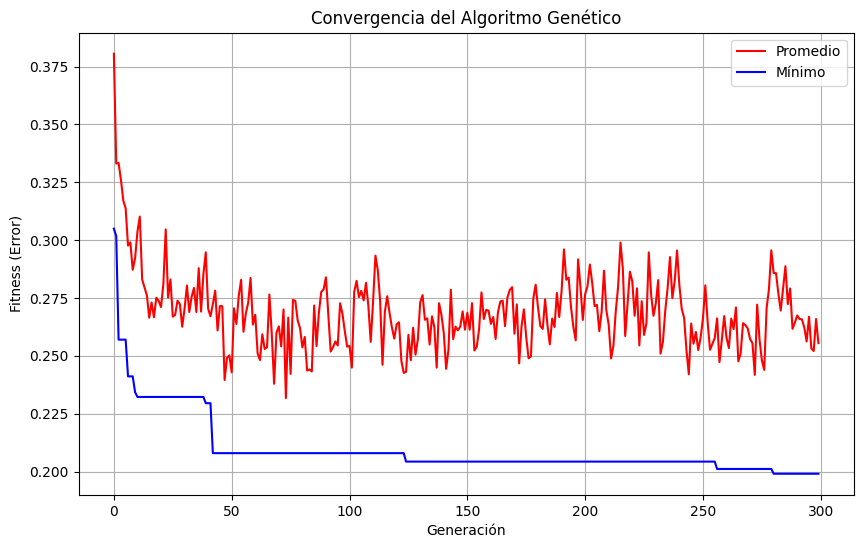

Mejores características seleccionadas: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [

In [6]:
target_column = 'Valor'
mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column, population_size=40, n_generations=300)
fig = plot_convergence(logbook=logbook)
print("Mejores características seleccionadas:", mejores_caracteristicas)
print("Mejor fitness:", hof[0].fitness.values[0])

In [7]:
len(mejores_caracteristicas[0])

45

In [8]:
carac = len(hof[0])
df = final.drop(columns='Valor')

In [9]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

# Assuming you have the best solution from hof
best_solution = hof[0]  # Get best individual from HallOfFame
#features = ['PIRange_7Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 
#           'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif',
#           'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif',
#           'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif',
#           'valor_humedad_suelo1', 'slope']
features = df.columns
selected_features = get_selected_features(best_solution, features)
print("Selected features:")
for feature in selected_features:
    print(f"- {feature}")

Selected features:
- alpha_15-30cm.tif
- FC.100-200cm.tif
- ksat_100-200cm.tif
- ksat_60-100cm.tif
- theta_s_5-15cm.tif
- PP
- valor_humedad_suelo1
- slope


In [10]:
#['PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif', 'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif', 'valor_humedad_suelo1', 'slope']